# Hearth disease dataset - EDA and preprocessing

In this notebook, we will perform exploratory data analysis (EDA) on a heath disease dataset, followed by building preprocessing pipelines for numerical and categorical features.

The dataset contains information about patients with a potential heath disease, including whether they have it or not. The objective is to predict if the patient has a hearth disease based on the available features, making this a binary classification problem. The dataset is sourced from Kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Setup

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Basic info and statistics

In [3]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    str    
 2   ChestPainType   918 non-null    str    
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    str    
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    str    
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    str    
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), str(5)
memory usage: 86.2 KB


In [4]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In total we have 12 columns:
| Feature | Description |
| :--- | :--- |
| **Age** | Age of the patient [years] |
| **Sex** | Sex of the patient [M: Male, F: Female] |
| **ChestPainType** | Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| **RestingBP** | Resting blood pressure [mm Hg] |
| **Cholesterol** | Serum cholesterol [mm/dl] |
| **FastingBS** | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] |
| **RestingECG** | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy] |
| **MaxHR** | Maximum heart rate achieved [Numeric value between 60 and 202] |
| **ExerciseAngina** | Exercise-induced angina [Y: Yes, N: No] |
| **Oldpeak** | Oldpeak = ST [Numeric value measured in depression] |
| **ST_Slope** | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] |
| **HeartDisease** | Output class [1: heart disease, 0: normal] |

## Visualization of the numerical columns

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

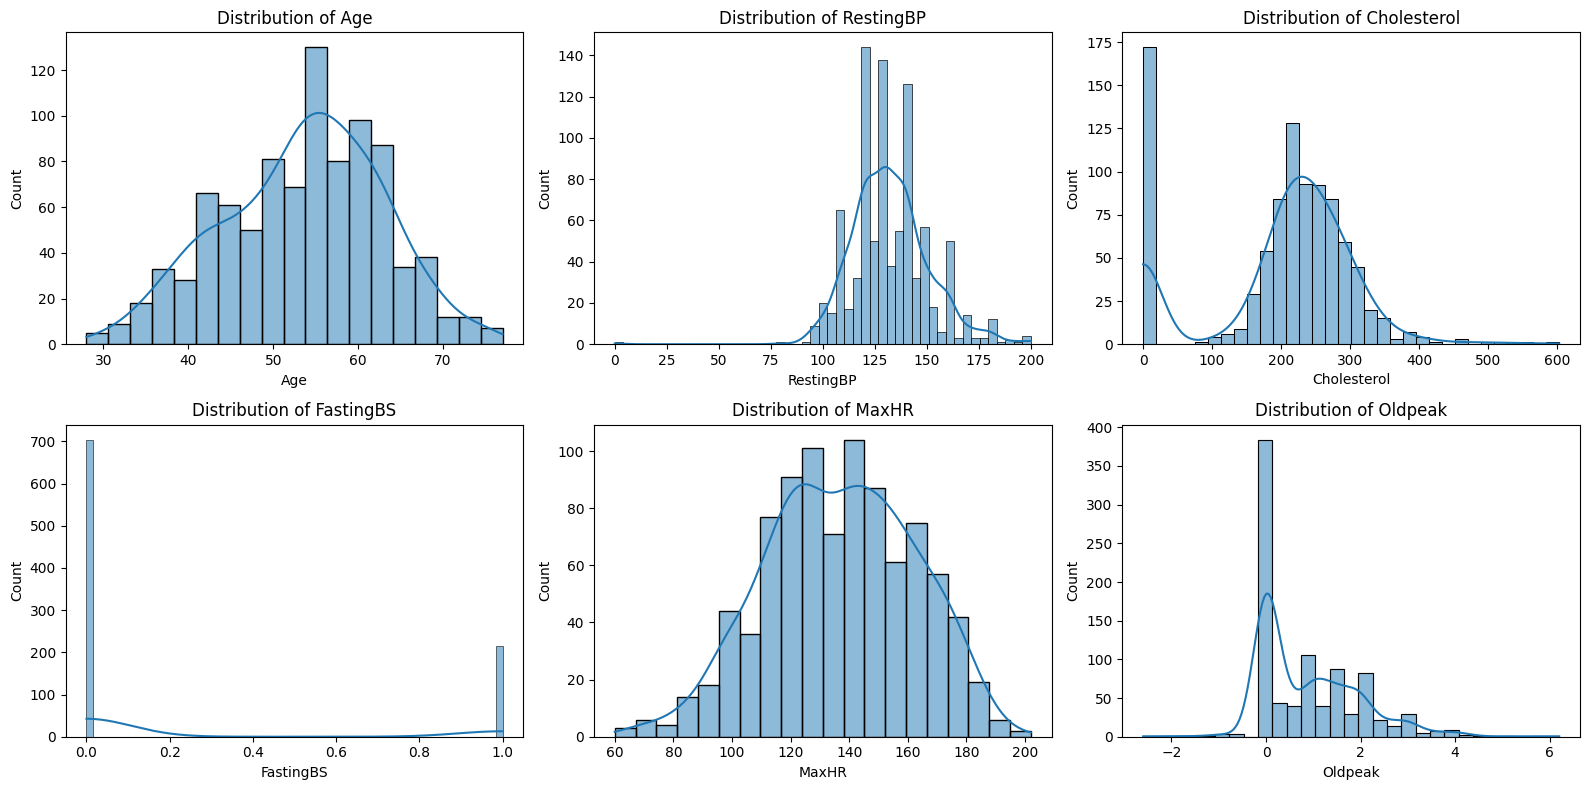

In [6]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

fig, axs = plt.subplots(2, 3, figsize=(16, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

fig.tight_layout()

As we can see the `Cholesterol` and `RestingBP` have some `0` values, which are imposible for an alive human beign, these false zeroes are handled in the `Handling missing` values cell.

## Visualization of categorical columns

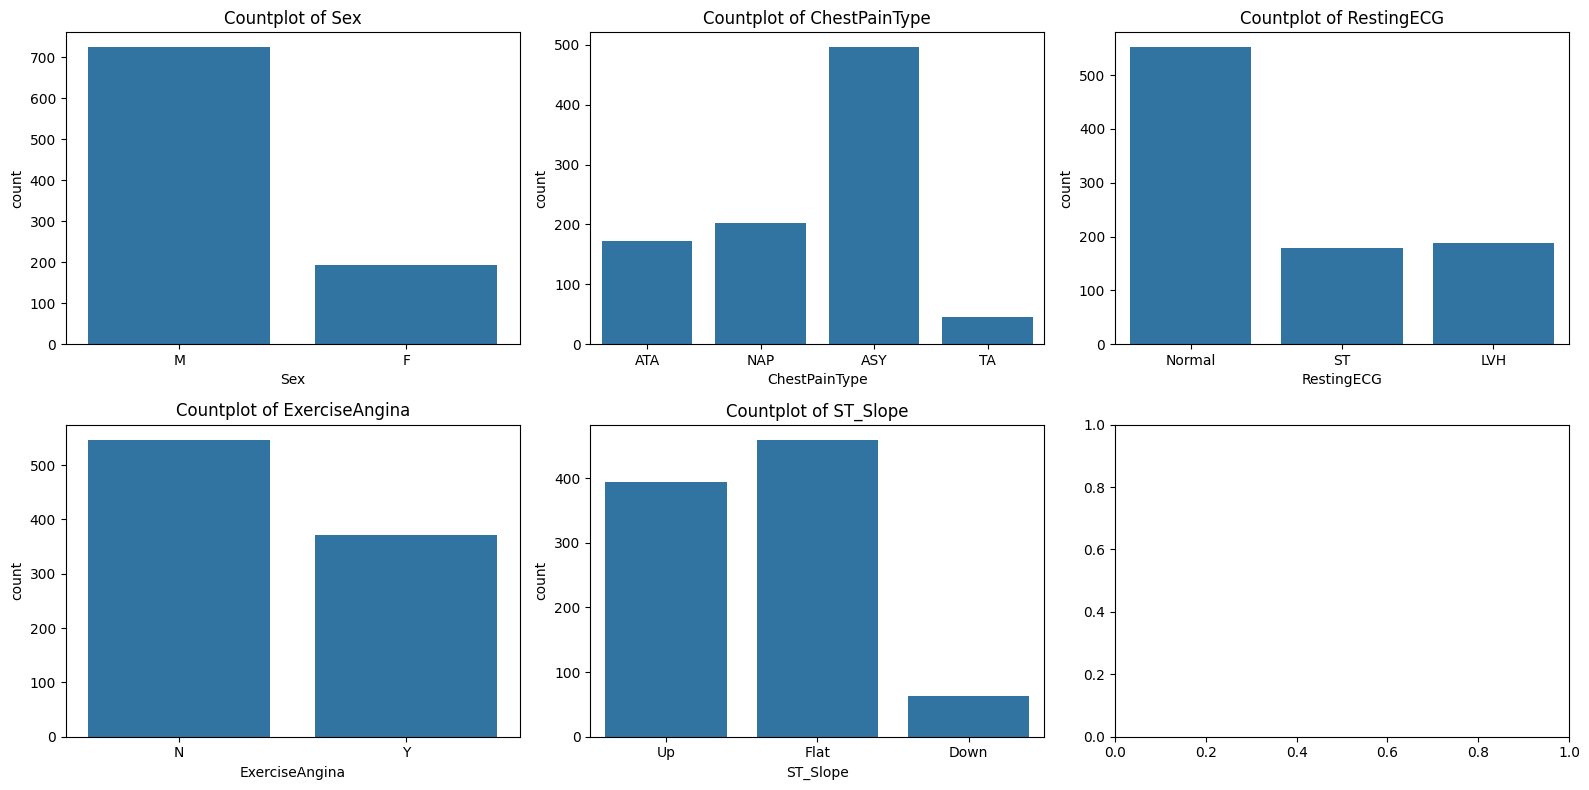

In [7]:
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

fig, axs = plt.subplots(2, 3, figsize=(16, 8))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')

fig.tight_layout()

## Target label distribution
Finally, let's visualize the distribution of the target label, HeartDisease, to understand the class balance in the dataset.

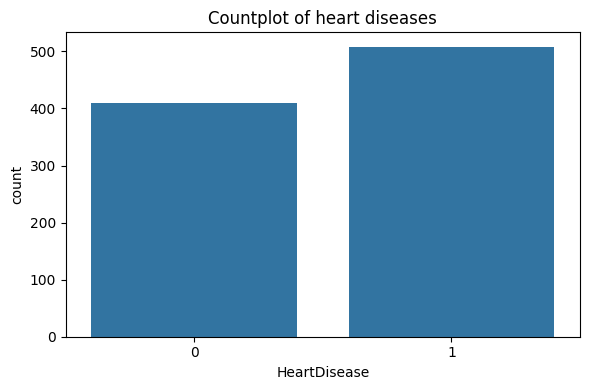

In [8]:
fig = plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='HeartDisease')
plt.title('Countplot of heart diseases')
plt.tight_layout()

## Handling missing values

We can visualize the count of missing values for each column using a bar plot.

<Axes: >

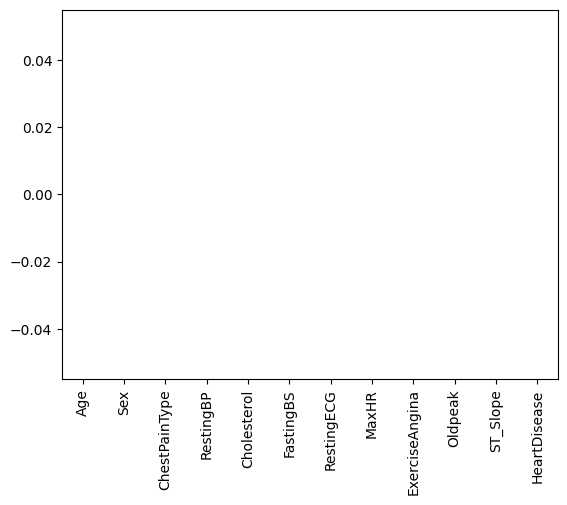

In [9]:
missing_counts = data.isnull().sum()
missing_counts.plot(kind='bar')

As we can see, there is not any null value in our dataset but, as we saw before, we have some imposible values (`Cholesterol` and `RestingBP`).

In [10]:
imposible_values = data[["Cholesterol", "RestingBP"]].eq(0).sum()
print(imposible_values)
missing_cholesterol_rate = data[["Cholesterol"]].eq(0).mean() * 100
print(f"Missing Cholesterol Rate: {missing_cholesterol_rate['Cholesterol']:.2f}%")

Cholesterol    172
RestingBP        1
dtype: int64
Missing Cholesterol Rate: 18.74%


Since we only have one zero value in the `RestingBP` column we can drop that row. For the `Cholesterol` we can address the zero values with the mean of the column.

In [14]:
# Delete row with impossible value
data = data[data['RestingBP'] != 0]

## Preprocessing pipelines

Now that we have analyzed the dataset and decided on strategies for handling missing values, we can proceed to build preprocessing pipelines for both numerical and categorical features.

We can declaratively create a preprocessing pipeline using ColumnTransformer to apply different transformations to numerical and categorical columns. Each of these transformations can be a pipeline itself, created using make_pipeline. In particular, the transformations we will apply are:

    * To the `Cholesterol` numerical column: impute zero values with the mean of the column, followed by standard scalling.
    * To the `RestingBP` numerical column: impute zero values droping the only row where there is a zero value.

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
preprocessin_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num_impute', make_pipeline(
                SimpleImputer(strategy='mean', missing_values=0),
                StandardScaler()
            ), ['Cholesterol']),
            ('num', StandardScaler(), ['Age', 'RestingBP', 'MaxHR', 'Oldpeak', 'FastingBS']),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), 
             ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
        ]
    )
)

In [15]:
x = data[numerical_cols + categorical_cols]
y = data['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

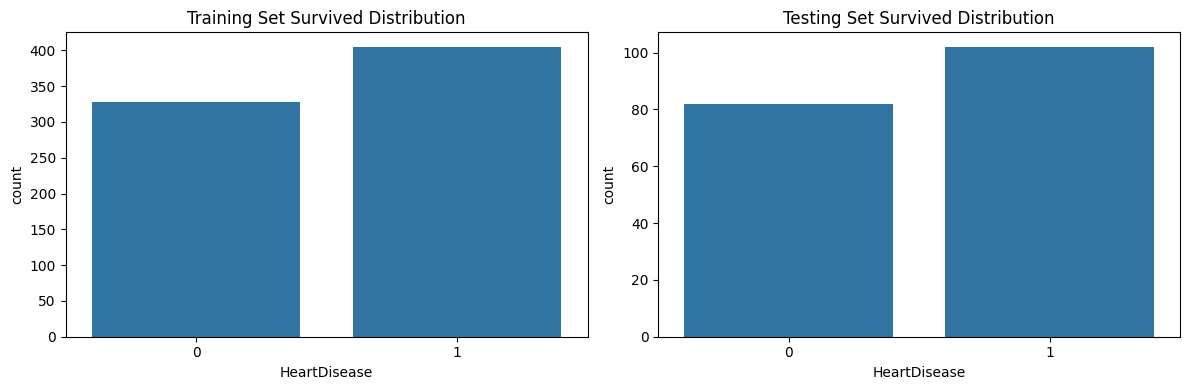

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x=y_train, ax=axs[0])
axs[0].set_title('Training Set Survived Distribution')
sns.countplot(x=y_test, ax=axs[1])
axs[1].set_title('Testing Set Survived Distribution')
fig.tight_layout()